In [1]:
import numpy as np
import os
import matplotlib.pyplot as plot
from PIL import Image
import cv2
import random
import seaborn as sns
import tensorflow as tf

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_folder="/content/drive/MyDrive/train"
valid_folder="/content/drive/MyDrive/val"
width = 256
height = 256
classes = 13
batch_size = 10
num_of_training_samples = len(os.listdir(train_folder))
num_of_testing_samples = len(os.listdir(valid_folder))

In [4]:
def LoadImage(name, path):
    img = Image.open(os.path.join(path, name))
    img = np.array(img)

    image = img[:,:256]
    mask = img[:,256:]

    return image, mask

In [5]:
def getSegmentationArr(mask, classes, width=width, height=height):
    masked=mask.reshape((mask.shape[0]*mask.shape[1],3))
    pred=kmeans.predict(masked)
    pred.shape
    pred=pred.reshape(mask.shape[0],mask.shape[1])

    seg_labels = np.zeros((height, width, classes))

    for c in range(classes):
        seg_labels[:, :, c] = (pred == c ).astype(int)
    return seg_labels

In [6]:
train_list=os.listdir('/content/drive/MyDrive/train')
from tqdm import tqdm
colors=[]

for i in tqdm(range(150)):
    x,y=LoadImage(train_list[i],train_folder)
    colors.append(y.reshape(y.shape[0]*y.shape[1],3))


100%|██████████| 150/150 [00:45<00:00,  3.31it/s]


In [7]:
colors = np.array(colors)
colors = colors.reshape((colors.shape[0]*colors.shape[1],3))
colors.shape

(9830400, 3)

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=13, random_state=0)
kmeans.fit(colors)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=13, random_state=0)

In [9]:
kmeans.cluster_centers_

array([[ 70.55533796,  70.38033556,  68.5137875 ],
       [236.40457844,  40.03467106, 224.93222409],
       [ 78.08882606, 124.66940283, 170.47378238],
       [128.06291087,  63.11643887, 127.58616857],
       [113.18894514, 132.27471944,  80.38589173],
       [  3.44520016,   1.55952405, 138.82739975],
       [  5.65459131,   4.11589265,   6.66421001],
       [180.04580111, 171.24702794, 155.77843138],
       [106.65206922, 140.3994308 ,  35.27505793],
       [198.35498518,  27.55344195,  57.21871302],
       [216.59809378, 197.80052761,  40.3289252 ],
       [  5.74064547,  70.14997552,  97.48001647],
       [ 79.94689616,   6.86320666,  70.98895626]])

In [10]:
l=list(kmeans.labels_)
s=set(l)
s

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [11]:
def give_color_to_seg_img(seg, n_classes=classes):

    seg_img = np.zeros( (seg.shape[0],seg.shape[1],3) ).astype('float')
    colors = sns.color_palette("hls", n_classes)

    for c in range(n_classes):
        segc = (seg == c)
        seg_img[:,:,0] += (segc*( colors[c][0] ))
        seg_img[:,:,1] += (segc*( colors[c][1] ))
        seg_img[:,:,2] += (segc*( colors[c][2] ))

    return(seg_img)

In [12]:
def addColors(gg):
        im = np.zeros([gg.shape[0],gg.shape[1],3],dtype=np.uint8)
        for i in range(gg.shape[0]):
             for u in range(gg.shape[1]):
                if gg[i,u]==0:
                        im[i,u]=np.array( [7.97324365,  100.09284559, 3.3311774 ])# np.array([106.90082868, 139.99479298,  36.44992868]) #dirty-green
                if gg[i,u]==12:
                        im[i,u]= np.array([125.15370551, 128.00683271, 102.70661342])
                if gg[i,u]==11:
                        im[i,u]= np.array( [205.10936684, 155.91383531, 158.10853995])
                if gg[i,u]==10:
                        im[i,u]= np.array([202.89782929,  26.40039899,  61.60446492])
                if gg[i,u]==9:
                        im[i,u]= np.array([ 69.55103943,  70.40548991,  69.17557542])#road
                if gg[i,u]==8:
                        im[i,u]=np.array( [127.97324365,  63.09284559, 127.3311774 ])

                if gg[i,u]==7:
                        im[i,u]=np.array([ 76.50791694, 126.13882776, 172.87875815]) #sky
                if gg[i,u]==6:
                        im[i,u]=np.array( [157.75659272, 245.35283586, 155.30654771]) #road-dividers
                if gg[i,u]==4:
                        im[i,u]=np.array([ 80.53963208,   6.04446257,  71.14193837]) #buildings
                if gg[i,u]==5:
                        im[i,u]= np.array( [  3.55582649,   3.56494346, 136.37082893])#vehicles
                if gg[i,u]==3:
                        im[i,u]=np.array( [237.59908029,  39.26874128, 225.79570494])
                if gg[i,u]==2:
                        im[i,u]=np.array([  4.1605802 ,   3.27185434,   6.7030066 ])
                if gg[i,u]==1:
                        im[i,u]=np.array( [214.7472683 , 206.44713466,  33.15308545])
                #if gg[i,u]==0:
                 #       im[i,u]=np.array([0,128,0])
        return im

In [13]:
im,mask=LoadImage(train_list[4],train_folder)
c1=getSegmentationArr(mask, classes, width=width, height=height)
#c=give_color_to_seg_img(np.argmax(c1,axis=-1), n_classes=13)
c=addColors(np.argmax(c1,axis=-1))

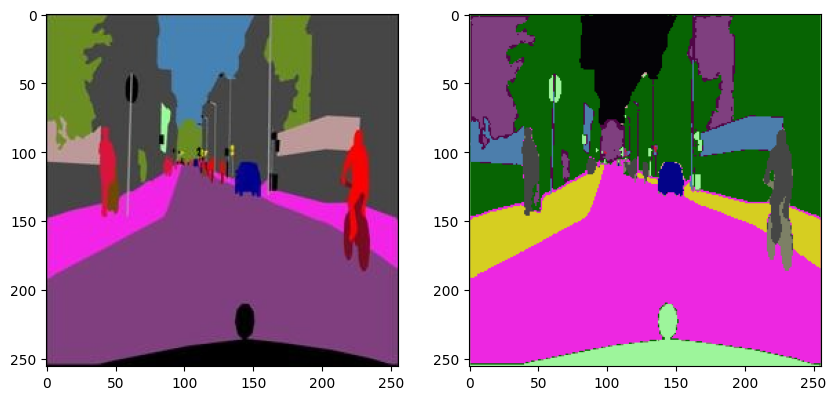

In [14]:
fig,ax=plot.subplots(1,2,figsize=(10,10))
ax[0].imshow(mask)
ax[1].imshow(c)
plot.show()

In [15]:
def DataGenerator(path, batch_size=10, classes=13):
    files = os.listdir(path)
    while True:
        for i in range(0, len(files), batch_size):
            batch_files = files[i : i+batch_size]
            imgs=[]
            segs=[]
            for file in batch_files:
                image, mask = LoadImage(file, path)
                labels = getSegmentationArr(mask, classes)

                imgs.append(image)
                segs.append(labels)

            yield np.array(imgs), np.array(segs)

In [16]:
train_gen = DataGenerator(train_folder, batch_size=batch_size)
val_gen = DataGenerator(valid_folder, batch_size=batch_size)

In [17]:
imgs, segs = next(train_gen)
imgs.shape, segs.shape

((10, 256, 256, 3), (10, 256, 256, 13))

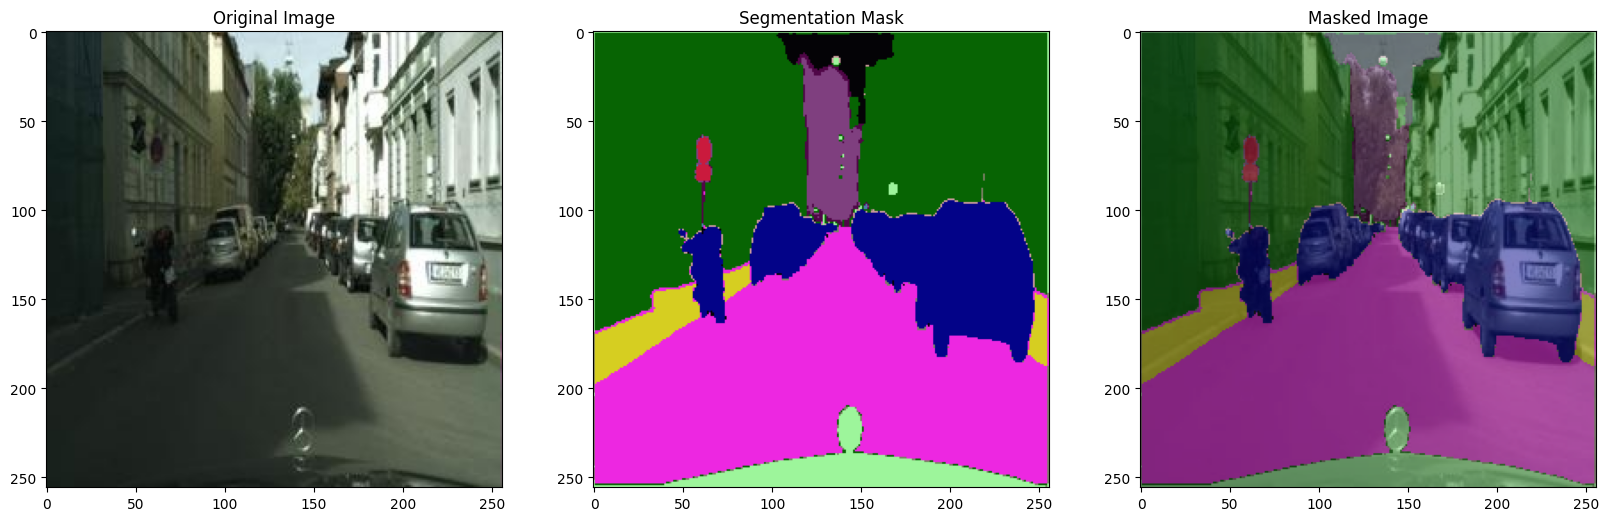

In [18]:
image = imgs[7]
mask = addColors(np.argmax(segs[7], axis=-1))
masked_image = cv2.addWeighted(image, 0.5, mask,0.5, 0)

fig, axs = plot.subplots(1, 3, figsize=(20,20))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(mask)
axs[1].set_title('Segmentation Mask')
#predimg = cv2.addWeighted(imgs[i]/255, 0.6, _p, 0.4, 0)
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
plot.show()

In [19]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

In [20]:
def segnet(pretrained_weights = None,input_size = (256,256,3)):
    inputs = Input(input_size)
    #step1
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1=BatchNormalization()(conv1)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1=BatchNormalization()(conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    #step2
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2=BatchNormalization()(conv2)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2=BatchNormalization()(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    #step3
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3=BatchNormalization()(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    #step4
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4=BatchNormalization()(conv4)
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4=BatchNormalization()(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    #step5
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    conv5=BatchNormalization()(conv5)
    conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5=BatchNormalization()(conv5)
    pool5 = MaxPooling2D(pool_size=(2, 2))(conv5)

    #step6
    up6 = Conv2D(1024, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(pool5))
    merge6 = concatenate([conv5,up6], axis = 3)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6=BatchNormalization()(conv6)
    conv6 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6=BatchNormalization()(conv6)

    #step7
    up7 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = concatenate([conv4,up7], axis = 3)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7=BatchNormalization()(conv7)
    conv7 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7=BatchNormalization()(conv7)

    #step8
    up8 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv3,up8], axis = 3)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8=BatchNormalization()(conv8)
    conv8 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8=BatchNormalization()(conv8)

    #step9
    up9 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv2,up9], axis = 3)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9=BatchNormalization()(conv9)
    conv9 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9=BatchNormalization()(conv9)

    #step10
    up10 = Conv2D(64,3,activation='relu',padding='same',kernel_initializer = 'he_normal')(UpSampling2D(size=(2,2))(conv9))
    merge10 = concatenate([conv1,up10],axis=3)
    conv10 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge10)
    conv10=BatchNormalization()(conv10)
    conv10 = Conv2D(13, 1, activation = 'softmax')(conv10)

    model = Model(inputs,conv10)
    opt = Adam(learning_rate=0.0001)
    model.compile(optimizer=opt,
             loss="categorical_crossentropy",
             metrics=["accuracy"])
    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [21]:
model=segnet(pretrained_weights = None,input_size = (256,256,3))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 64)         1792      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 256, 256, 64)         256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 64)         36928     ['batch_normalization[0][0

In [22]:
history = model.fit(train_gen, epochs=10, steps_per_epoch=num_of_training_samples//batch_size,
                       validation_data=val_gen, validation_steps=num_of_testing_samples//batch_size)

Epoch 1/10
297/297 [==============================] - 339s 972ms/step - loss: 0.9838 - accuracy: 0.7233 - val_loss: 1.3094 - val_accuracy: 0.7123
Epoch 2/10
297/297 [==============================] - 265s 893ms/step - loss: 0.7581 - accuracy: 0.7829 - val_loss: 0.9066 - val_accuracy: 0.7547
Epoch 3/10
297/297 [==============================] - 264s 891ms/step - loss: 0.6890 - accuracy: 0.7993 - val_loss: 0.7780 - val_accuracy: 0.7694
Epoch 4/10
297/297 [==============================] - 270s 910ms/step - loss: 0.6395 - accuracy: 0.8119 - val_loss: 0.7341 - val_accuracy: 0.7836
Epoch 5/10
297/297 [==============================] - 264s 890ms/step - loss: 0.6049 - accuracy: 0.8208 - val_loss: 0.6974 - val_accuracy: 0.7958
Epoch 6/10
297/297 [==============================] - 264s 890ms/step - loss: 0.5653 - accuracy: 0.8312 - val_loss: 0.6710 - val_accuracy: 0.8015
Epoch 7/10
297/297 [==============================] - 264s 890ms/step - loss: 0.5301 - accuracy: 0.8403 - val_loss: 0.6684 -

In [23]:
import cv2
m='105.jpg'
m,tru=LoadImage(m, valid_folder)
i=np.asarray(m)
i=i.reshape((1,256,256,3))
i.shape

(1, 256, 256, 3)

1/1 [==============================] - 3s 3s/step


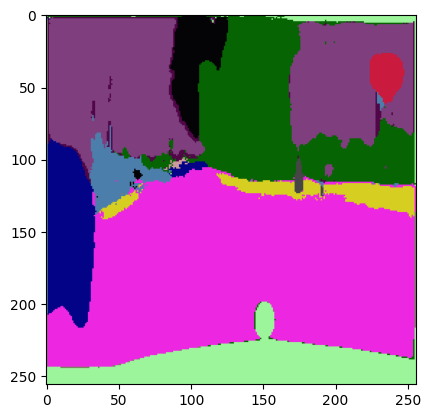

In [24]:
r=model.predict(i)
r=r.reshape((256,256,-1))
s=addColors(np.argmax(r, axis=-1))
plot.imshow(s)

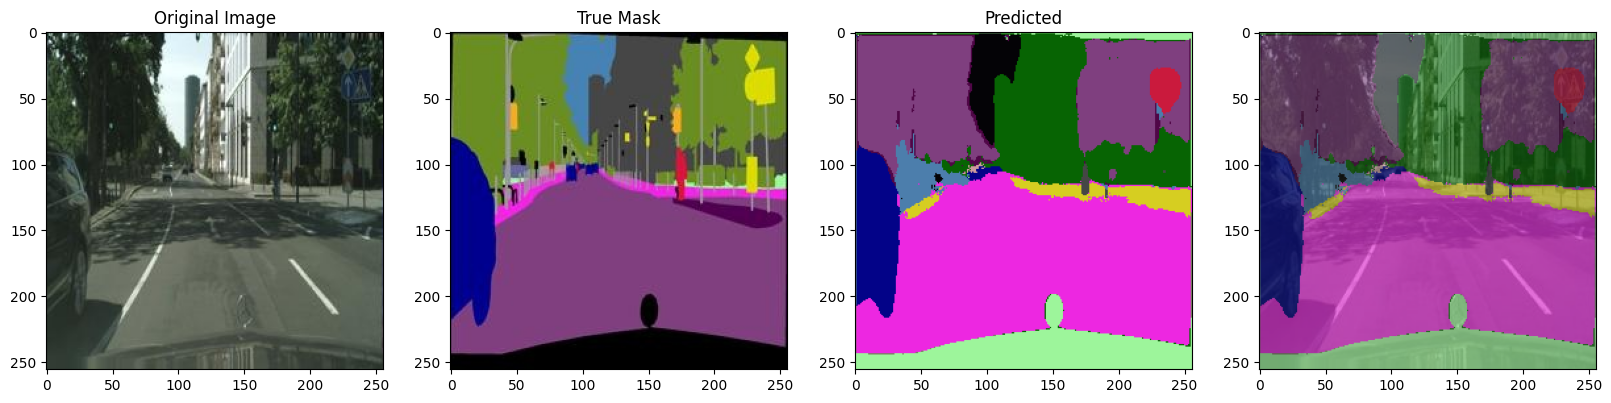

In [25]:
from cv2 import *
fig, axs = plot.subplots(1, 4, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(tru)
axs[1].set_title('True Mask')
axs[2].imshow(s)
axs[2].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.4,s,0.6, 0)
axs[3].imshow(masked_image)
plot.show()

## Final Predictions:

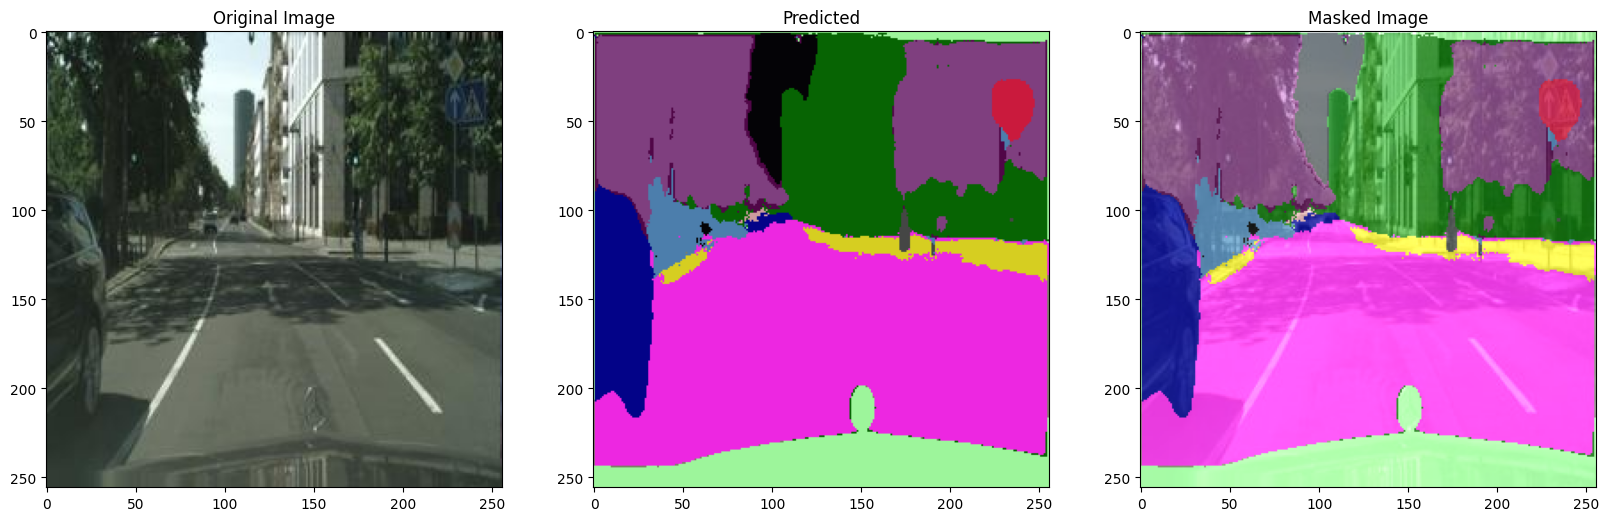

In [26]:
from cv2 import *
fig, axs = plot.subplots(1, 3, figsize=(20,20))
axs[0].imshow(m)
axs[0].set_title('Original Image')
axs[1].imshow(s)
axs[1].set_title('Predicted')
masked_image = cv2.addWeighted(m, 0.5,s,0.9, 0)
axs[2].imshow(masked_image)
axs[2].set_title('Masked Image')
plot.show()